# Homework 1 (Income Prediction)

The goal of this assignment is to predict whether an individual makes more or less than $50,000 given demographic data. A data dictionary was provided:  

age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [1]:
# analysis packages
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras import models
from keras.regularizers import l2
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import sklearn
from sklearn import compose
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import warnings
import tensorflow as tf

### EDA

In [2]:
# read training data from .csv
trainDF = pd.read_csv('./adult.csv')

# drop id column (wont be used for modeling)
trainDF.drop('id', axis = 1, inplace = True)

# check data frame dimension
display(trainDF.shape)

# peek at data
display(trainDF.head())

# check data types
display(trainDF.info())

# check for missing data
display(trainDF.isna().sum())

(32561, 15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Numeric Predictors

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


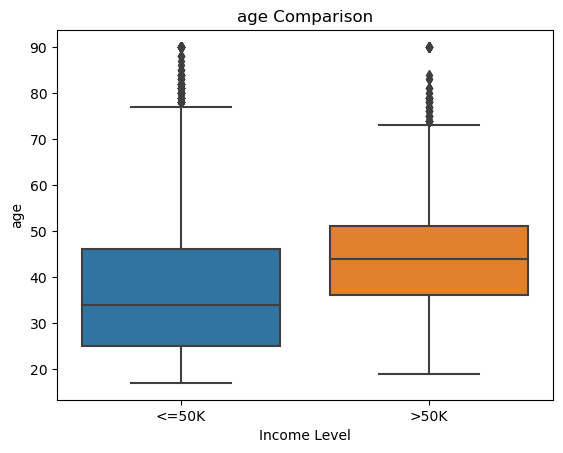

age    0.0
dtype: float64

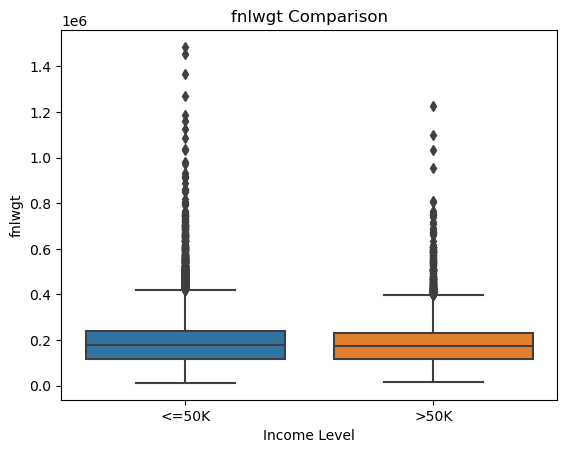

fnlwgt    0.0
dtype: float64

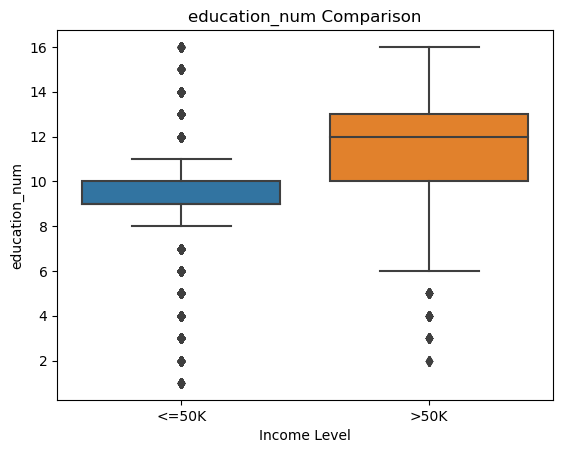

education_num    0.0
dtype: float64

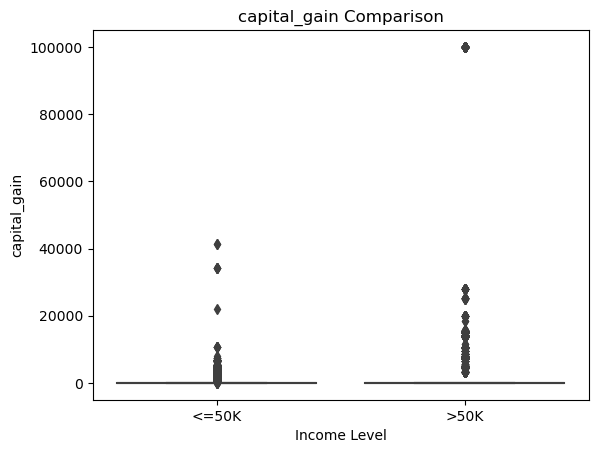

capital_gain    3.414377e-108
dtype: float64

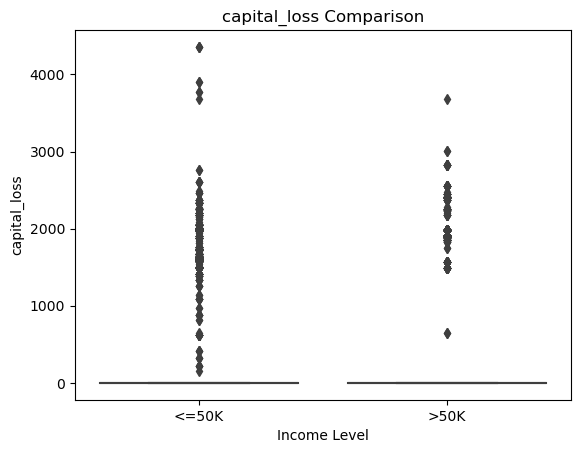

capital_loss    0.003841
dtype: float64

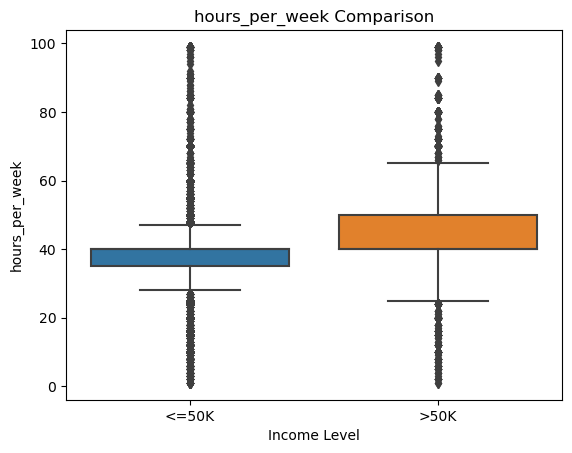

hours_per_week    0.0
dtype: float64

In [57]:
# summarize numeric data
display(trainDF.describe())

# suppress warnings
warnings.filterwarnings('ignore')

# numeric analysis function
def studyNumPredictor(pred):
    # boxplot by income level
    plot = sns.boxplot(x = trainDF['income'], y = trainDF[pred])
    plot.set(xlabel = 'Income Level', title = f"{pred} Comparison")
    plt.show()

    # single logistic regression
    logFit = LogisticRegression().fit(np.array(trainDF[pred]).reshape(-1, 1), trainDF['income'])
    logFit = sm.Logit(pd.get_dummies(trainDF['income'])['>50K'], trainDF[pred]).fit(disp = 0)
    display(logFit.pvalues)


# identify and study numeric predictors
findNumPredictors = make_column_selector(dtype_include = int)
for pred in trainDF[findNumPredictors].columns:
    studyNumPredictor(pred)

### Categorical Predictors

In [58]:
# categorical analysis function
def studyCatPredictor(pred):
    # construct contingency table
    contingency = pd.crosstab(trainDF['income'], trainDF[pred])
    display(contingency)

    # chi squared test for independence
    print(f"Chi-squared test p-value: {stats.chi2_contingency(contingency)[1]}")

# identify and study categorical predictors
findCatPredictors = make_column_selector(dtype_include = object)
for pred in trainDF.drop('income', axis = 1, inplace = False)[findCatPredictors].columns:
    studyCatPredictor(pred)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


Chi-squared test p-value: 2.026505431120716e-220


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


Chi-squared test p-value: 0.0


marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


Chi-squared test p-value: 0.0


occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,1652,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277
>50K,191,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320


Chi-squared test p-value: 0.0


relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
income,,,,,,
<=50K,7275,7449,944,5001,3228,823
>50K,5918,856,37,67,218,745


Chi-squared test p-value: 0.0


race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,275,763,2737,246,20699
>50K,36,276,387,25,7117


Chi-squared test p-value: 2.305960610160958e-70


sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


Chi-squared test p-value: 0.0


native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,...,33,102,9,64,31,15,17,21999,62,10
>50K,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7171,5,6


Chi-squared test p-value: 2.2113858852543023e-44


### Model Preparation

In [5]:
# scale numeric predictors and encode categorical predictors
findNumPredictors = make_column_selector(dtype_include = int)
findCatPredictors = make_column_selector(dtype_include = object)
transform = make_column_transformer((MinMaxScaler(), findNumPredictors),
                                    (OneHotEncoder(drop = 'first'), findCatPredictors))

# get new column names
colNames = transform.fit(trainDF).get_feature_names_out()

# transform data
modelDF = pd.DataFrame.sparse.from_spmatrix(transform.fit_transform(trainDF), columns = colNames)

# set random seed
np.random.seed(432023)

# split data into predictors and response
resp = modelDF['onehotencoder__income_>50K'].rename('income')
modelDF.drop('onehotencoder__income_>50K', axis = 1, inplace = True)

# split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(modelDF, resp, test_size = 0.2)

### Model Fitting

A KNN model using 28 neighbors achieved 83.4% cross-validation accuracy. 

In [87]:
# set random seed
np.random.seed(482023)

# tune KNN model
Kvalues = range(1, 30)
knnFit = KNeighborsClassifier()
knnTune = GridSearchCV(knnFit,
                       param_grid = {'n_neighbors': Kvalues},
                       cv = 5,
                       n_jobs = -1,
                       verbose = 2)
knnTune.fit(modelDF, resp)
K = knnTune.best_params_['n_neighbors']

# set random seed
np.random.seed(482023)

# fit KNN model
knnFit = KNeighborsClassifier(n_neighbors = K)
cvResults = cross_val_score(knnFit,
                            modelDF,
                            resp,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2)

# cross-validation accuracy
print(f"Neighbors considered: {K}")
print(f"Cross-validation accuracy: {np.mean(cvResults).round(4)}")

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END ......................................n_neighbors=2; total time=  27.5s
[CV] END ......................................n_neighbors=1; total time=  27.8s
[CV] END ......................................n_neighbors=2; total time=  27.8s
[CV] END ......................................n_neighbors=2; total time=  27.9s
[CV] END ......................................n_neighbors=1; total time=  28.1s
[CV] END ......................................n_neighbors=1; total time=  28.1s
[CV] END ......................................n_neighbors=1; total time=  28.4s
[CV] END ......................................n_neighbors=1; total time=  28.6s
[CV] END ......................................n_neighbors=3; total time=  26.9s
[CV] END ......................................n_neighbors=3; total time=  27.1s
[CV] END ......................................n_neighbors=3; total time=  26.7s
[CV] END ......................................

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  15.7s
[CV] END .................................................... total time=  15.6s
[CV] END .................................................... total time=  15.7s
[CV] END .................................................... total time=  15.8s
[CV] END .................................................... total time=  15.7s
[CV] END .................................................... total time=  15.8s
[CV] END .................................................... total time=  15.8s
[CV] END .................................................... total time=  15.8s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   15.9s remaining:    6.8s


[CV] END .................................................... total time=  10.6s
[CV] END .................................................... total time=  10.7s
Neighbors considered: 28
Cross-validation accuracy: 0.834


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.4s finished


A random forest model using 22 features achieved 85.69% cross-validation accuracy.

In [90]:
# tune random forest model
Mvalues = range(1, 30)
rfFit = RandomForestClassifier(random_state = 482023)
rfTune = GridSearchCV(rfFit,
                      param_grid = {'max_features': Mvalues},
                      cv = 5,
                      n_jobs = -1,
                      verbose = 2)
rfTune.fit(modelDF, resp)
M = rfTune.best_params_['max_features']

# fit random forest model
rfFit = RandomForestClassifier(max_features = M,
                               n_estimators = 1000,
                               random_state = 482023)
cvResults = cross_val_score(rfFit,
                            modelDF,
                            resp,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2)

# cross-validation accuracy
print(f"Features considered: {M}")
print(f"Cross-validation accuracy: {np.mean(cvResults).round(4)}")

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END .....................................max_features=2; total time=  10.4s
[CV] END .....................................max_features=1; total time=  10.9s
[CV] END .....................................max_features=1; total time=  10.8s
[CV] END .....................................max_features=1; total time=  10.9s
[CV] END .....................................max_features=1; total time=  10.9s
[CV] END .....................................max_features=1; total time=  11.2s
[CV] END .....................................max_features=2; total time=  11.0s
[CV] END .....................................max_features=2; total time=  11.0s
[CV] END .....................................max_features=2; total time=  10.5s
[CV] END .....................................max_features=2; total time=  10.4s
[CV] END .....................................max_features=3; total time=  10.4s
[CV] END .....................................m

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 2.4min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.4min remaining:  1.0min


[CV] END .................................................... total time= 2.4min
[CV] END .................................................... total time= 1.5min
[CV] END .................................................... total time= 1.5min
Features considered: 22
Cross-validation accuracy: 0.8569


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished


In [14]:
# model fitting and evaluation function
def EvaluateModel(model, early = False, criteria = 'val_loss', opt = 'min'):
    # set random seed
    np.random.seed(462023)
    tf.random.set_seed(482023)

    # compile model
    model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

    # model summary
    model.summary()

    # number of epochs
    EPOCHS = 50

    if early:
        # early stopping criteria
        earlyStop = EarlyStopping(monitor = criteria, mode = opt, verbose = 1, patience = 3)

        # train model
        trained = model.fit(X_train, 
                            to_categorical(y_train), 
                            epochs = EPOCHS, 
                            batch_size = 128, 
                            validation_split = 0.2,
                            callbacks = earlyStop,
                            verbose = 1)
    else:
        # train model
        trained = model.fit(X_train, 
                            to_categorical(y_train), 
                            epochs = EPOCHS, 
                            batch_size = 128, 
                            validation_split = 0.2,
                            verbose = 1)

    # prepare model evaluation
    acc = trained.history['accuracy']
    val_acc = trained.history['val_accuracy']
    loss = trained.history['loss']
    val_loss = trained.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # plot training accuracy
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

A simple MLP with one hidden layer was fit using 50 epochs and a batch size of 128. This model achieved a training accuracy of 88.03% and a validation accuracy of 85.16%. This model displayed clear evidence of overfitting with validation accuracy flattening out after about 10 epochs. 

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 512)               51712     
                                                                 
 dense_104 (Dense)           (None, 2)                 1026      
                                                                 
Total params: 52,738
Trainable params: 52,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 2s 13ms/step - loss: 0.3736 - accuracy: 0.8237 - val_loss: 0.3483 - val_accuracy: 0.8340
Epoch 2/50
163/163 [==============================] - 2s 12ms/step - loss: 0.3398 - accuracy: 0.8401 - val_loss: 0.3363 - val_accuracy: 0.8447
Epoch 3/50
163/163 [==============================] - 2s 12ms/step - loss: 0.3290 - accuracy: 0.8452 - val_loss: 0.3375 - val_accuracy: 0.8411
Epoch 4/50
163/1

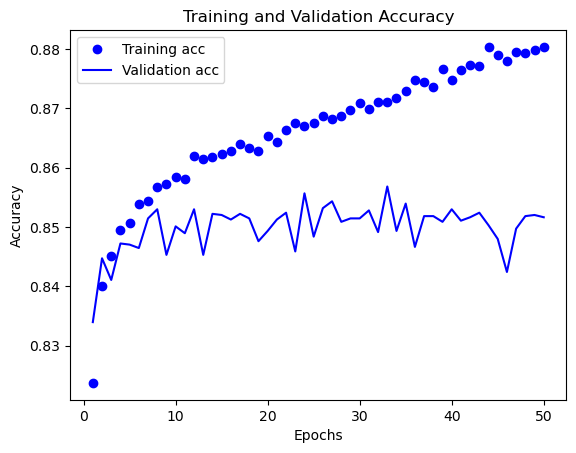

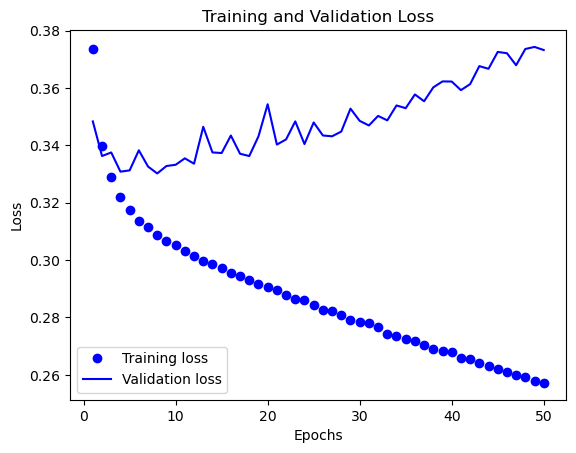

In [63]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, False)

The previous model was expanded to include two hidden layers. This model achieved a training accuracy of 90.64% and a validation accuracy of 83.38%. This model alsodisplayed clear evidence of overfitting with validation accuracy decreasing after about 10 epochs. 

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 512)               51712     
                                                                 
 dense_106 (Dense)           (None, 256)               131328    
                                                                 
 dense_107 (Dense)           (None, 2)                 514       
                                                                 
Total params: 183,554
Trainable params: 183,554
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 15ms/step - loss: 0.3681 - accuracy: 0.8251 - val_loss: 0.3462 - val_accuracy: 0.8369
Epoch 2/50
163/163 [==============================] - 2s 13ms/step - loss: 0.3374 - accuracy: 0.8419 - val_loss: 0.3360 - val_accuracy: 0.8455
Epoch 3/50
163/163 [=====

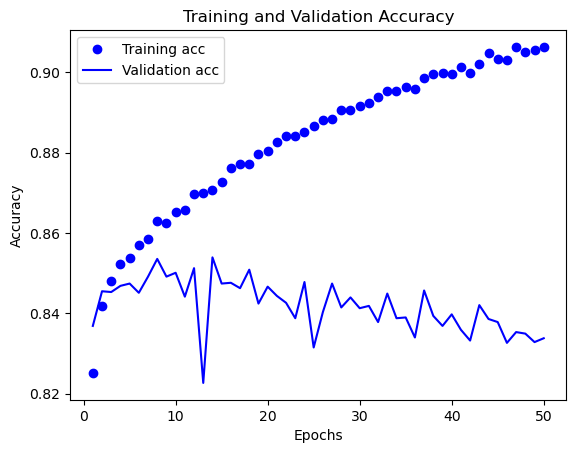

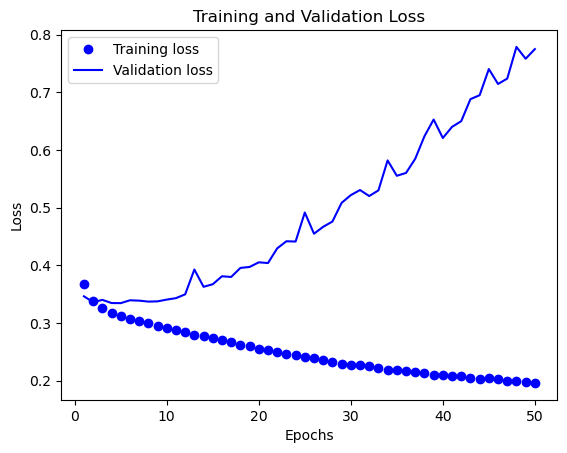

In [64]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, False)

The original model was again expanded to include three hidden layers. This model achieved a training accuracy of 90.87% and a validation accuracy of 83.45%. This model also displayed clear evidence of overfitting with validation accuracy decreasing after about 10 epochs. 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 512)               51712     
                                                                 
 dense_109 (Dense)           (None, 256)               131328    
                                                                 
 dense_110 (Dense)           (None, 128)               32896     
                                                                 
 dense_111 (Dense)           (None, 2)                 258       
                                                                 
Total params: 216,194
Trainable params: 216,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 17ms/step - loss: 0.3703 - accuracy: 0.8261 - val_loss: 0.3464 - val_accuracy: 0.8380
Epoch 2/50
163/163 [================

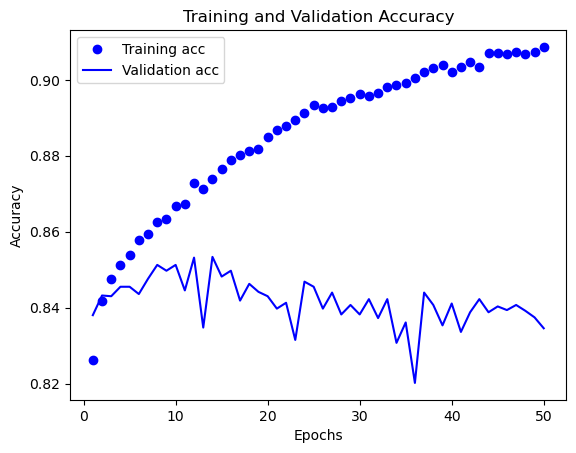

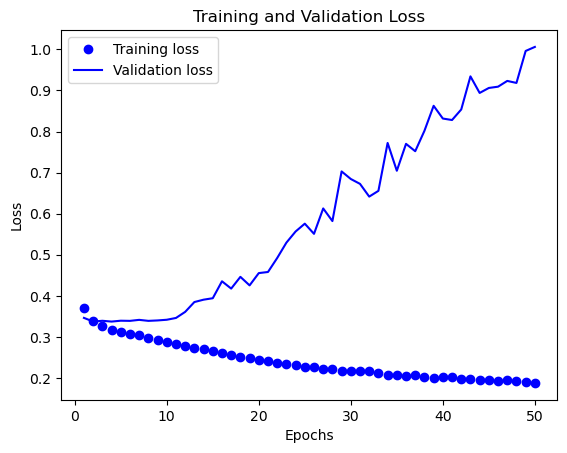

In [65]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, False)

Due to clear evidence of overfitting, an early stopping algorithm (based on validation loss) was applied to the original model with one hidden layer. Stopping after 7 epochs, this model achieved a training accuracy of 85.44% and a validation accuracy 85.14%.

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 512)               51712     
                                                                 
 dense_113 (Dense)           (None, 2)                 1026      
                                                                 
Total params: 52,738
Trainable params: 52,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 15ms/step - loss: 0.3736 - accuracy: 0.8237 - val_loss: 0.3483 - val_accuracy: 0.8340
Epoch 2/50
163/163 [==============================] - 2s 12ms/step - loss: 0.3398 - accuracy: 0.8401 - val_loss: 0.3363 - val_accuracy: 0.8447
Epoch 3/50
163/163 [==============================] - 2s 13ms/step - loss: 0.3290 - accuracy: 0.8452 - val_loss: 0.3375 - val_accuracy: 0.8411
Epoch 4/50
163/1

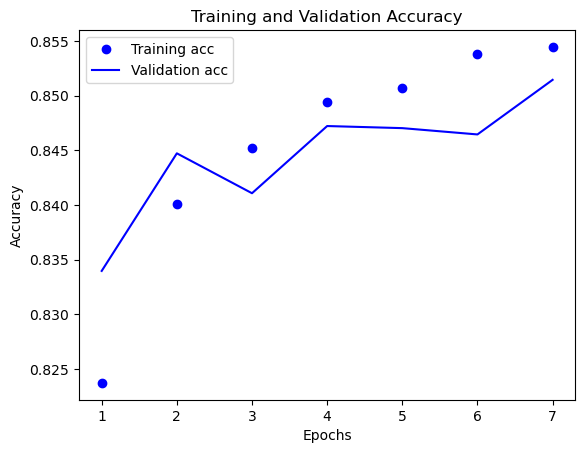

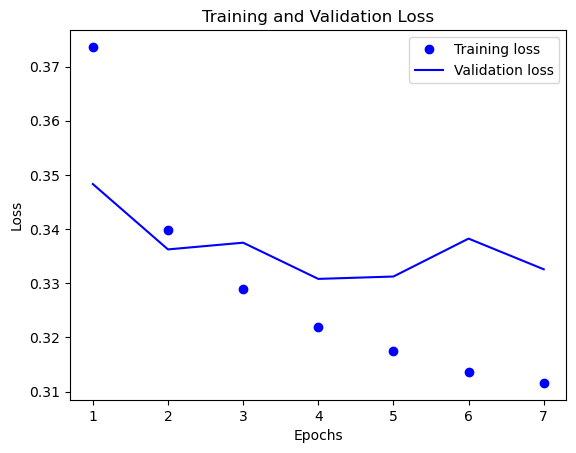

In [66]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

Another early stopping algorithm (based on validation accuracy) was applied to the original model with one hidden layer. Stopping after 11 epochs, this model achieved a training accuracy of 85.80% and a validation accuracy 84.89%.

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 512)               51712     
                                                                 
 dense_115 (Dense)           (None, 2)                 1026      
                                                                 
Total params: 52,738
Trainable params: 52,738
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 2s 13ms/step - loss: 0.3736 - accuracy: 0.8237 - val_loss: 0.3483 - val_accuracy: 0.8340
Epoch 2/50
163/163 [==============================] - 2s 11ms/step - loss: 0.3398 - accuracy: 0.8401 - val_loss: 0.3363 - val_accuracy: 0.8447
Epoch 3/50
163/163 [==============================] - 2s 12ms/step - loss: 0.3290 - accuracy: 0.8452 - val_loss: 0.3375 - val_accuracy: 0.8411
Epoch 4/50
163/1

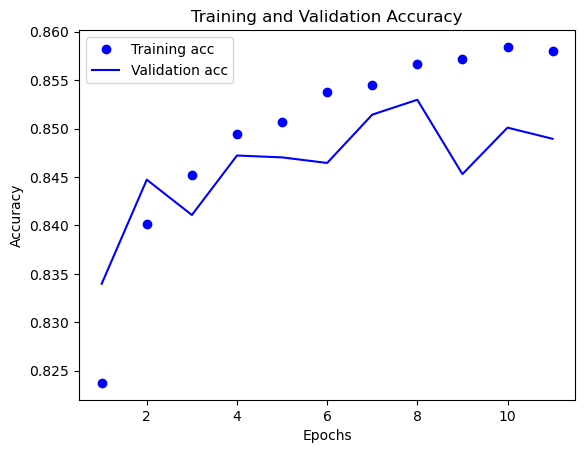

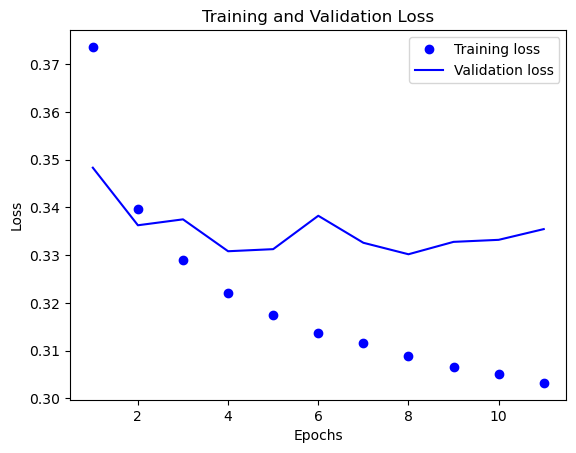

In [67]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True, 'val_accuracy', 'max')

An early stopping algorithm (based on validation loss) was applied to the MLP with three hidden layers. Stopping after 7 epochs, this model achieved a training accuracy of 85.94% and a valiation accuracy of 84.76%.

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 512)               51712     
                                                                 
 dense_117 (Dense)           (None, 256)               131328    
                                                                 
 dense_118 (Dense)           (None, 128)               32896     
                                                                 
 dense_119 (Dense)           (None, 2)                 258       
                                                                 
Total params: 216,194
Trainable params: 216,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3703 - accuracy: 0.8261 - val_loss: 0.3464 - val_accuracy: 0.8380
Epoch 2/50
163/163 [================

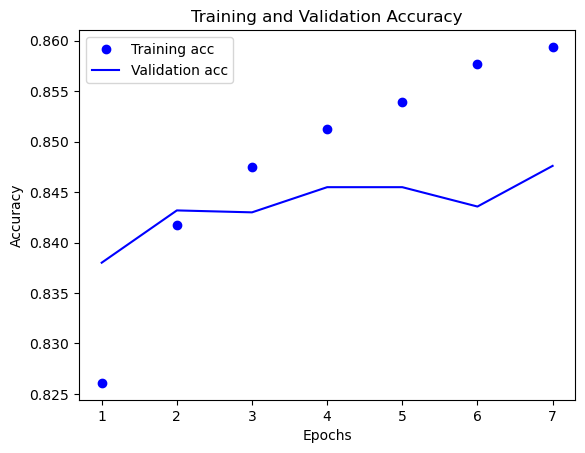

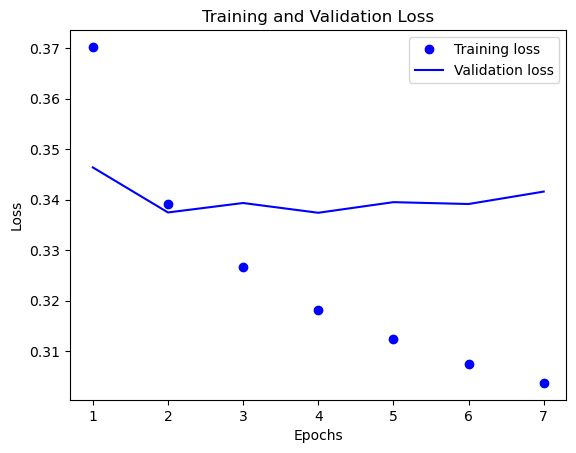

In [68]:
# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

Dropout regularization with a rate of 0.25 was applied to the MLP with three hidden layers. Stopping after 8 epochs, this model achieved a training accuracy of 85.65% and a validation accuracy of 85.18%.

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 512)               51712     
                                                                 
 dropout_34 (Dropout)        (None, 512)               0         
                                                                 
 dense_121 (Dense)           (None, 256)               131328    
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_123 (Dense)           (None, 2)               

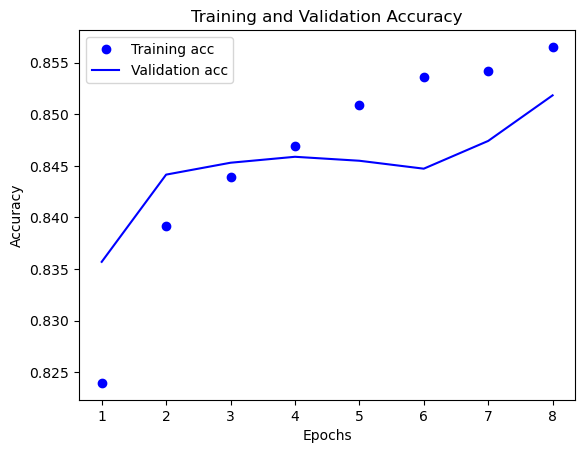

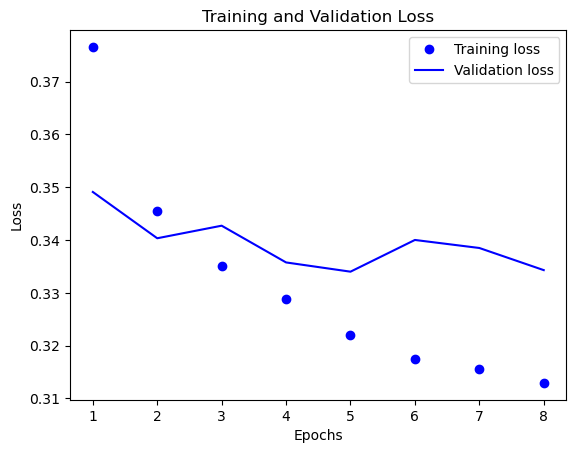

In [69]:
# dropout rate
RATE = 0.25

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dropout(rate = RATE),
    Dense(256, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(128, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(2, activation = 'sigmoid')
])

EvaluateModel(model, True)

Dropout regularization with a rate of 0.5 was applied to the MLP with three hidden layers. Stopping after 8 epochs, this model achieved a training accuracy of 84.95% and a validation accuracy of 84.64%.

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 512)               51712     
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_125 (Dense)           (None, 256)               131328    
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_126 (Dense)           (None, 128)               32896     
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_127 (Dense)           (None, 2)               

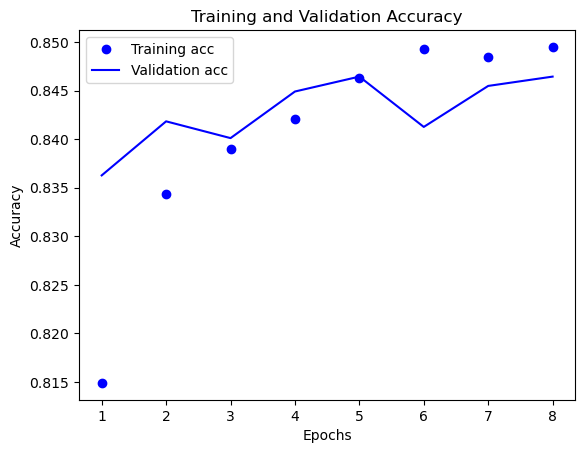

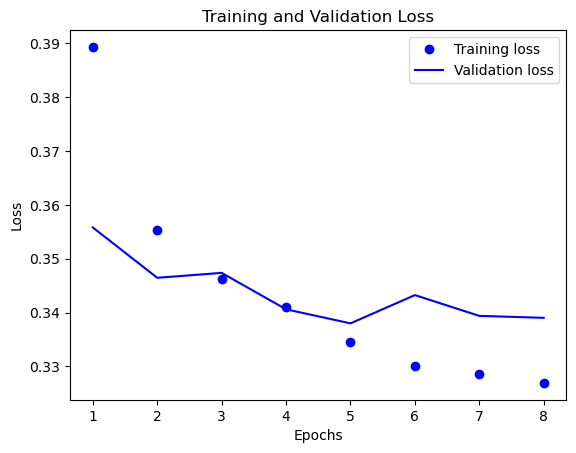

In [70]:
# dropout rate
RATE = 0.5

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dropout(rate = RATE),
    Dense(256, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(128, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.001) was applied to the MLP with three hidden layers. Stopping after 27 epochs, this model achieved a training accuracy of 85.80% and a validation accuracy of 85.49%.

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 512)               51712     
                                                                 
 dense_129 (Dense)           (None, 256)               131328    
                                                                 
 dense_130 (Dense)           (None, 128)               32896     
                                                                 
 dense_131 (Dense)           (None, 2)                 258       
                                                                 
Total params: 216,194
Trainable params: 216,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 4s 19ms/step - loss: 0.5973 - accuracy: 0.8256 - val_loss: 0.4339 - val_accuracy: 0.8357
Epoch 2/50
163/163 [================

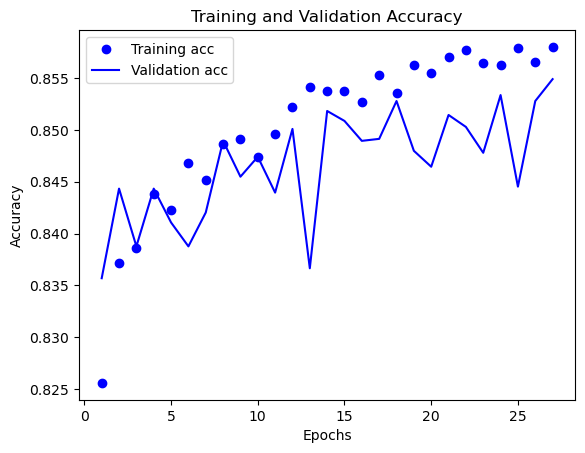

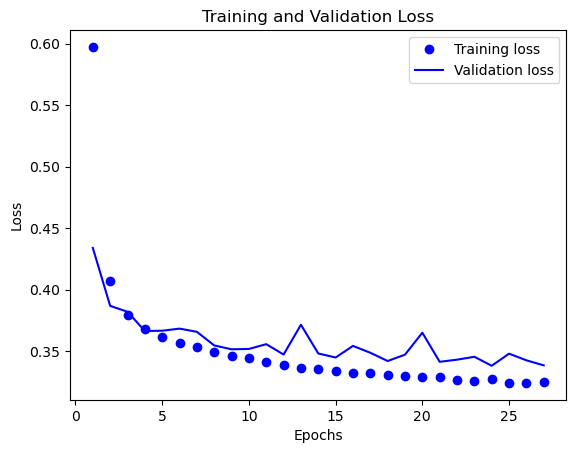

In [71]:
# penalty hyperparameter
PENALTY = 0.001

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.01) was applied to the MLP with three hidden layers. Stopping after 17 epochs, this model achieved a training accuracy of 83.53% and a validation accuracy of 83.69.

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 512)               51712     
                                                                 
 dense_133 (Dense)           (None, 256)               131328    
                                                                 
 dense_134 (Dense)           (None, 128)               32896     
                                                                 
 dense_135 (Dense)           (None, 2)                 258       
                                                                 
Total params: 216,194
Trainable params: 216,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 17ms/step - loss: 1.4629 - accuracy: 0.8160 - val_loss: 0.4634 - val_accuracy: 0.8190
Epoch 2/50
163/163 [================

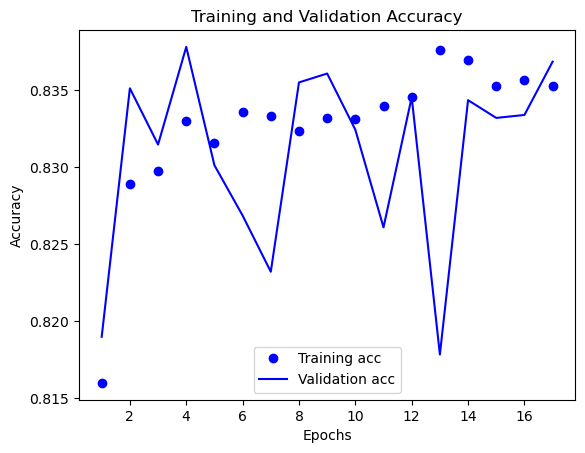

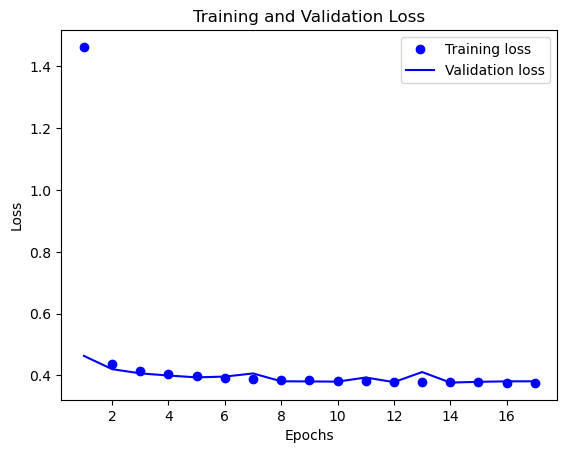

In [72]:
# penalty hyperparameter
PENALTY = 0.01

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.001) was applied to the MLP with four hidden layers. Stopping after 27 epochs, this model achieved a training accuracy of 85.78% and a validation accuracy of 85.51%.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 512)               51712     
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 2)                 130       
                                                                 
Total params: 224,322
Trainable params: 224,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [============================

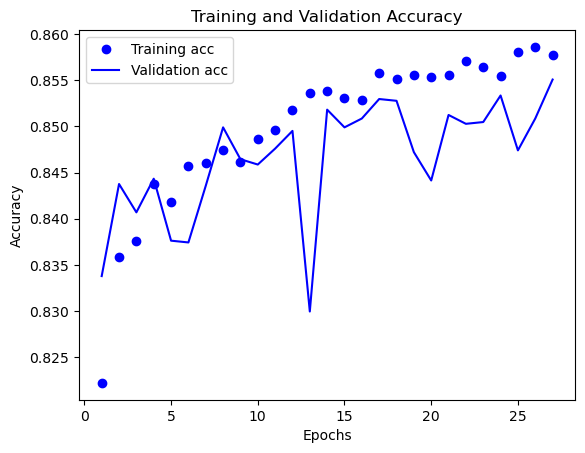

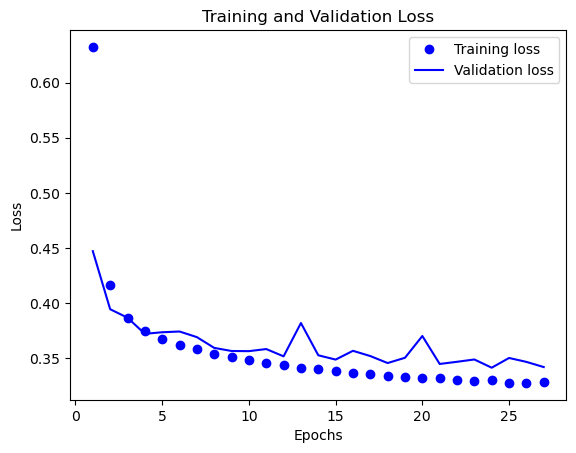

In [15]:
# penalty hyperparameter
PENALTY = 0.001

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(64, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.001) was applied to the MLP with eight hidden layers. Stopping after 27 epochs, this model achieved a training accuracy of 85.92% and a validation accuracy of 85.66%.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               51712     
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                

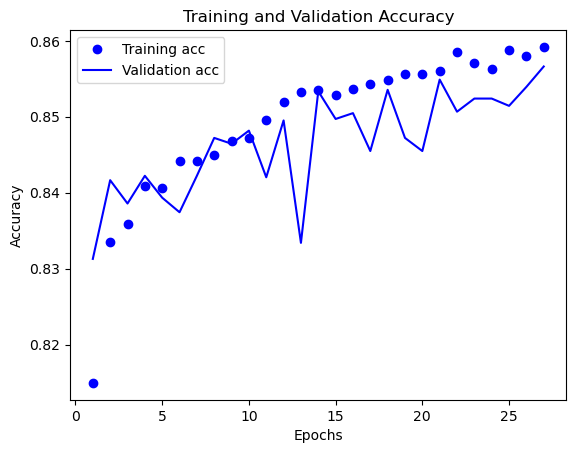

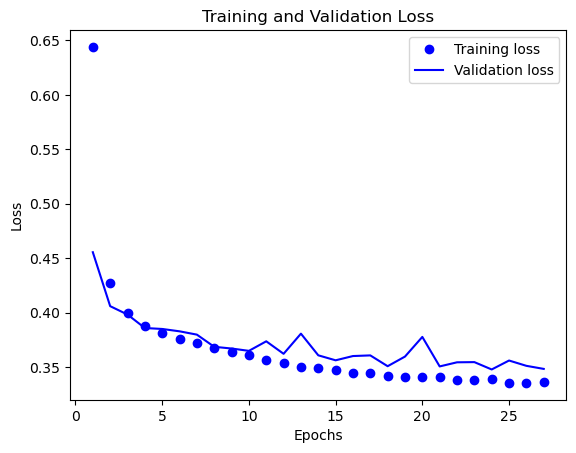

In [10]:
# penalty hyperparameter
PENALTY = 0.001

# define model architecture
model = models.Sequential([
    Dense(512, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(64, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(32, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(16, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(8, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(4, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.001) was applied to a thinner MLP with three hidden layers. Stopping after 21 epochs, this model achieved a training accuracy of 85.50% and a validation accuracy of 84.89%.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 256)               25856     
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 2)                 130       
                                                                 
Total params: 67,138
Trainable params: 67,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 16ms/step - loss: 0.5588 - accuracy: 0.8220 - val_loss: 0.4484 - val_accuracy: 0.8328
Epoch 2/50
163/163 [==================

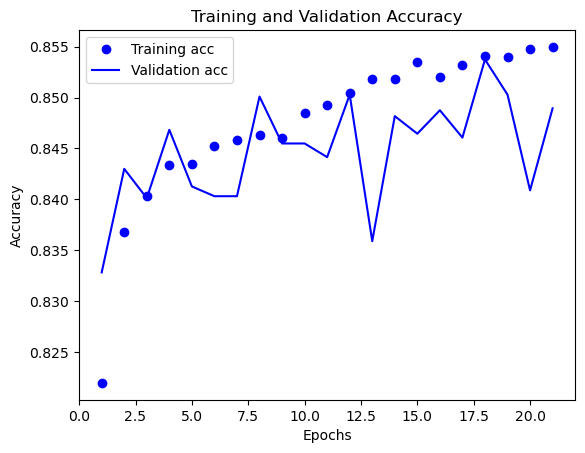

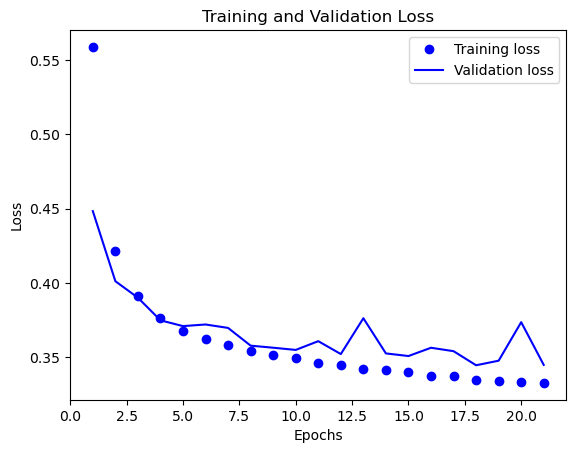

In [20]:
# penalty hyperparameter
PENALTY = 0.001

# define model architecture
model = models.Sequential([
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(64, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

An L2 normalizing penalty (strength of 0.001) was applied to a thinner MLP with three hidden layers and one dropout layer. Stopping after 15 epochs, this model achieved a training accuracy of 84.95% and a validation accuracy of 84.41%.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               25856     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               32896     
                                                                 
 dense_54 (Dense)            (None, 64)                8256      
                                                                 
 dense_55 (Dense)            (None, 2)                 130       
                                                                 
Total params: 67,138
Trainable params: 67,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
163/163 [==============================

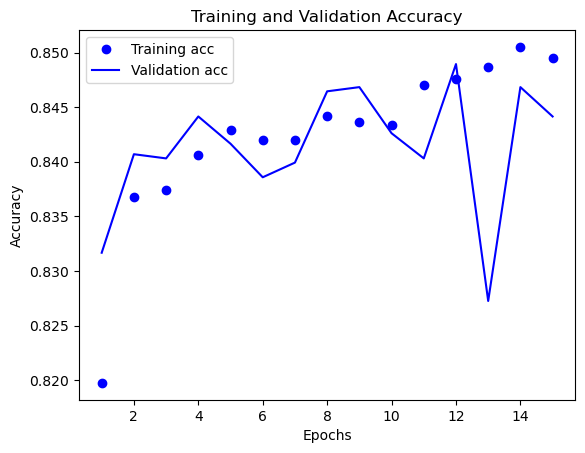

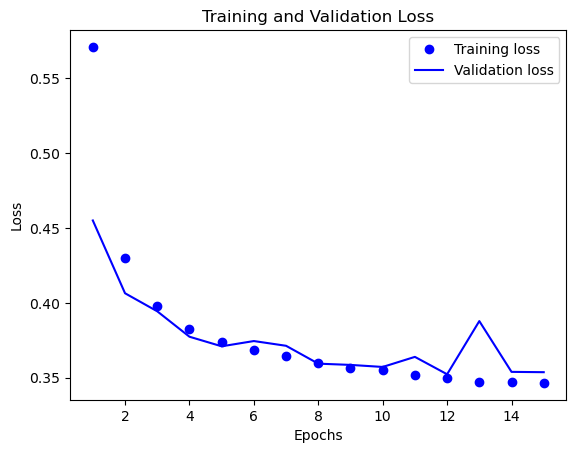

In [19]:
# penalty hyperparameter
PENALTY = 0.001

# define model architecture
model = models.Sequential([
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dropout(rate = RATE),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(64, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# evaluate model
EvaluateModel(model, True)

The tuned random forest model achieved 85.94% validation accuracy. 

In [51]:
# tuned max features hyperparamter
M = 22

# fit random forest model
model1 = RandomForestClassifier(max_features = M,
                                n_estimators = 1000,
                                random_state = 482023)
model1.fit(X_train, y_train) 

# predict on validation set
pred1 = model1.predict(X_valid)

# calculate validation accuracy
print(f"Validation accuracy: {(np.mean(pred1 == np.array(y_valid)) * 100).round(2)}%")

Validation accuracy: 85.94


The neural network with normalizing penalties achieved 85.77% validation accuracy.

In [52]:
# set random seeds
np.random.seed(462023)
tf.random.set_seed(482023)

# number of epochs
EPOCHS = 50

# early stopping criteria
earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

# tuned penalty hyperparameter
PENALTY = 0.001

# define model architecture
model2 = models.Sequential([
    Dense(512, activation = 'relu', kernel_regularizer = l2(PENALTY), input_shape = (X_train.shape[1], )),
    Dense(256, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(128, activation = 'relu', kernel_regularizer = l2(PENALTY)),
    Dense(2, activation = 'sigmoid')
])

# compile model
model2.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# train model
trained2 = model2.fit(X_train, 
                      to_categorical(y_train), 
                      epochs = EPOCHS, 
                      batch_size = 128, 
                      validation_split = 0.2,
                      callbacks = earlyStop,
                      verbose = 1)

# predict on validation set
pred2 = model2.predict(X_valid)

# calculate validation accuracy
print(f"Validation accuracy: {((np.mean(pred2[:,1].round() == np.array(y_valid))) * 100).round(2)}%")

Epoch 1/50
163/163 [==============================] - 3s 18ms/step - loss: 0.5973 - accuracy: 0.8256 - val_loss: 0.4339 - val_accuracy: 0.8357
Epoch 2/50
163/163 [==============================] - 3s 16ms/step - loss: 0.4073 - accuracy: 0.8372 - val_loss: 0.3868 - val_accuracy: 0.8443
Epoch 3/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3797 - accuracy: 0.8386 - val_loss: 0.3820 - val_accuracy: 0.8388
Epoch 4/50
163/163 [==============================] - 2s 15ms/step - loss: 0.3682 - accuracy: 0.8438 - val_loss: 0.3663 - val_accuracy: 0.8443
Epoch 5/50
163/163 [==============================] - 3s 17ms/step - loss: 0.3617 - accuracy: 0.8423 - val_loss: 0.3666 - val_accuracy: 0.8411
Epoch 6/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3568 - accuracy: 0.8468 - val_loss: 0.3683 - val_accuracy: 0.8388
Epoch 7/50
163/163 [==============================] - 2s 15ms/step - loss: 0.3535 - accuracy: 0.8452 - val_loss: 0.3657 - val_accuracy: 0.8420

The neural network with dropout achieved 85.51% validation accuracy.

In [66]:
# set random seed
np.random.seed(462023)
tf.random.set_seed(482023)

# dropout rate
RATE = 0.25

# define model architecture
model3 = models.Sequential([
    Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )),
    Dropout(rate = RATE),
    Dense(256, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(128, activation = 'relu'),
    Dropout(rate = RATE),
    Dense(2, activation = 'sigmoid')
])

# compile model
model3.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# train model
trained3 = model3.fit(X_train, 
                      to_categorical(y_train), 
                      epochs = EPOCHS, 
                      batch_size = 128, 
                      validation_split = 0.2,
                      callbacks = earlyStop,
                      verbose = 1)

# predict on validation set
pred3 = model3.predict(X_valid)

# calculate validation accuracy
print(f"Validation accuracy: {((np.mean(pred3[:,1].round() == np.array(y_valid))) * 100).round(2)}%")

Epoch 1/50
163/163 [==============================] - 4s 21ms/step - loss: 0.3766 - accuracy: 0.8240 - val_loss: 0.3491 - val_accuracy: 0.8357
Epoch 2/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3456 - accuracy: 0.8392 - val_loss: 0.3403 - val_accuracy: 0.8441
Epoch 3/50
163/163 [==============================] - 3s 17ms/step - loss: 0.3350 - accuracy: 0.8439 - val_loss: 0.3427 - val_accuracy: 0.8453
Epoch 4/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3288 - accuracy: 0.8470 - val_loss: 0.3358 - val_accuracy: 0.8459
Epoch 5/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3219 - accuracy: 0.8508 - val_loss: 0.3340 - val_accuracy: 0.8455
Epoch 6/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3174 - accuracy: 0.8536 - val_loss: 0.3400 - val_accuracy: 0.8447
Epoch 7/50
163/163 [==============================] - 3s 16ms/step - loss: 0.3156 - accuracy: 0.8542 - val_loss: 0.3385 - val_accuracy: 0.8474